# Análisis Exploratorio de Datos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importa los datos en un dataframe
df = pd.read_csv("./data.csv")

### Dataset inicial

In [ ]:
# Dataset inicial antes de preprocesarlo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91000 entries, 0 to 90999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         91000 non-null  int64 
 1   grado      91000 non-null  int64 
 2   nivel      91000 non-null  int64 
 3   scores     91000 non-null  int64 
 4   tiempo     91000 non-null  int64 
 5   resultado  91000 non-null  object
 6   juego      91000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 4.9+ MB


In [ ]:
df.describe()

,id,grado,nivel,scores,tiempo,juego
count,91000.000000,91000.000000,91000.000000,91000.000000,91000.000000,91000.000000
mean,45500.500000,3.499418,2.002154,15.471099,25.376066,1.500000
std,26269.581585,1.705553,0.815767,8.658118,14.444969,0.500003
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22750.750000,2.000000,1.000000,8.000000,13.000000,1.000000
50%,45500.500000,3.000000,2.000000,15.000000,25.000000,1.500000
75%,68250.250000,5.000000,3.000000,23.000000,38.000000,2.000000
max,91000.000000,6.000000,3.000000,30.000000,50.000000,2.000000


In [ ]:
# Muestra del dataset antes de preprocesarlo
df.head(10)

,id,grado,nivel,scores,tiempo,resultado,juego
0,1,6,3,11,28,NO APRENDIO,2
1,2,1,1,10,17,NO APRENDIO,2
2,3,2,1,23,19,NO APRENDIO,2
3,4,3,3,7,15,APRENDIO,2
4,5,3,3,25,36,NO APRENDIO,2
5,6,5,3,5,38,NO APRENDIO,2
6,7,5,3,21,29,NO APRENDIO,2
7,8,3,2,12,47,NO APRENDIO,2
8,9,2,2,7,16,NO APRENDIO,2
9,10,1,2,3,17,APRENDIO,2


# Análisis Exploratorio de Datos

### Preparación del dataset

In [ ]:
# Cambia el nombre de las columnas y establece el index
df.columns = ['id', 'grade', 'level', 'moves','time', 'result_test','game']
df = df.set_index('id')
df = df[['grade', 'game', 'level', 'moves', 'time', 'result_test']]

In [ ]:
# Cambia los atributos categóricos a texto
df['grade'] = df['grade'].map({
    1: 'First Grade',
    2: 'Second Grade',
    3: 'Third Grade',
    4: 'Fourth Grade',
    5: 'Fifth Grade',
    6: 'Sixth Grade'
})

df['game'] = df['game'].map({
    1: 'MST',
    2: 'Hanoi'
})

df['result_test'] = df['result_test'].map({
    'APRENDIO': 'Passed',
    'NO APRENDIO': 'Failed'
})

df.head(10)

,grade,game,level,moves,time,result_test
id,,,,,,
1,Sixth Grade,Hanoi,3,11,28,Failed
2,First Grade,Hanoi,1,10,17,Failed
3,Second Grade,Hanoi,1,23,19,Failed
4,Third Grade,Hanoi,3,7,15,Passed
5,Third Grade,Hanoi,3,25,36,Failed
6,Fifth Grade,Hanoi,3,5,38,Failed
7,Fifth Grade,Hanoi,3,21,29,Failed
8,Third Grade,Hanoi,2,12,47,Failed
9,Second Grade,Hanoi,2,7,16,Failed


### Descripción de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91000 entries, 1 to 91000
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   grade        91000 non-null  object
 1   game         91000 non-null  object
 2   level        91000 non-null  int64 
 3   moves        91000 non-null  int64 
 4   time         91000 non-null  int64 
 5   result_test  91000 non-null  object
dtypes: int64(3), object(3)
memory usage: 4.9+ MB


### Cantidad de registros

In [ ]:
# Calcula la cantidad de registros del dataset
len(df)

91000

### Exploración del contenido de los atributos

In [ ]:
from pandas.api.types import CategoricalDtype

grades_order = ['First Grade', 'Second Grade', 'Third Grade', 'Fourth Grade', 'Fifth Grade', 'Sixth Grade']
grade_type = CategoricalDtype(categories=grades_order, ordered=True)

# Convierte el arreglo en una serie categórica con el orden especificado
df['grade'] = pd.Series(df['grade'], dtype=grade_type)

df['grade'].unique().sort_values()

['First Grade', 'Second Grade', 'Third Grade', 'Fourth Grade', 'Fifth Grade', 'Sixth Grade']
Categories (6, object): ['First Grade' < 'Second Grade' < 'Third Grade' < 'Fourth Grade' <
                         'Fifth Grade' < 'Sixth Grade']

In [ ]:
sorted(df['game'].unique())

['Hanoi', 'MST']

In [ ]:
sorted(df['level'].unique())

[1, 2, 3]

In [ ]:
print(sorted(df['moves'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [ ]:
print(sorted(df['time'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [ ]:
sorted(df['result_test'].unique())


['Failed', 'Passed']

In [ ]:
# Exporta el dataframe
# df.to_csv('output.csv', index=False)

In [ ]:
# Separa el df por game
hanoi_df_raw = df[df['game'] == 'Hanoi']
hanoi_df_raw

,grade,game,level,moves,time,result_test
id,,,,,,
1,Sixth Grade,Hanoi,3,11,28,Failed
2,First Grade,Hanoi,1,10,17,Failed
3,Second Grade,Hanoi,1,23,19,Failed
4,Third Grade,Hanoi,3,7,15,Passed
5,Third Grade,Hanoi,3,25,36,Failed
...,...,...,...,...,...,...
45496,Fourth Grade,Hanoi,3,3,32,Passed
45497,Third Grade,Hanoi,3,15,1,Failed
45498,Fifth Grade,Hanoi,1,18,42,Failed


In [ ]:
# Definir una función para calcular los movimientos mínimos basados en el número de discos
def calculate_min_moves(disks):
    return 2**disks - 1

# Crear un diccionario para almacenar los discos por nivel
disks_by_level = {
    1: 2,
    2: 3,
    3: 4
}

# Calcular los movimientos mínimos para cada nivel
min_moves = {level: calculate_min_moves(disks) for level, disks in disks_by_level.items()}

# Filtrar el DataFrame para eliminar registros con movimientos menores al mínimo requerido
hanoi_df = hanoi_df_raw[hanoi_df_raw.apply(lambda x: x['moves'] >= min_moves[x['level']], axis=1)]
hanoi_df = hanoi_df[hanoi_df['moves'] <= hanoi_df['time']]
hanoi_df

,grade,game,level,moves,time,result_test
id,,,,,,
2,First Grade,Hanoi,1,10,17,Failed
5,Third Grade,Hanoi,3,25,36,Failed
7,Fifth Grade,Hanoi,3,21,29,Failed
8,Third Grade,Hanoi,2,12,47,Failed
9,Second Grade,Hanoi,2,7,16,Failed
...,...,...,...,...,...,...
45488,Sixth Grade,Hanoi,3,29,33,Failed
45492,Second Grade,Hanoi,1,13,41,Failed
45493,Fifth Grade,Hanoi,1,17,40,Failed


In [ ]:
print(sorted(hanoi_df['moves'].unique()))
print(sorted(hanoi_df['time'].unique()))

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


### Cálculo de scores

In [ ]:
evaluation_path = "./evaluation_per_grade.xlsx"
evaluation_df = pd.read_excel(evaluation_path)

# Cambia los atributos categóricos a texto
evaluation_df['grade'] = evaluation_df['grade'].map({
    1: 'First Grade',
    2: 'Second Grade',
    3: 'Third Grade',
    4: 'Fourth Grade',
    5: 'Fifth Grade',
    6: 'Sixth Grade'
})

evaluation_df['game'] = evaluation_df['game'].map({
    1: 'MST',
    2: 'Hanoi'
})

In [ ]:
# Convertir el DataFrame de evaluación en un diccionario
evaluation_dict = {}
for _, row in evaluation_df.iterrows():
    key = (row['grade'], row['level'])
    evaluation_dict[key] = {'moves_max': row['moves_max'], 'time_max': row['time_max']}

# Crear una columna para verificar si se cumplen los criterios de moves y time
hanoi_df['result_game'] = hanoi_df.apply(
    lambda x: 'Passed' if x['moves'] <= evaluation_dict[(x['grade'], x['level'])]['moves_max'] and x['time'] <= evaluation_dict[(x['grade'], x['level'])]['time_max'] else 'Failed',
    axis=1
)

# Mostrar las primeras filas del DataFrame con la nueva columna
hanoi_df

,grade,game,level,moves,time,result_test,result_game
id,,,,,,,
2,First Grade,Hanoi,1,10,17,Failed,Failed
5,Third Grade,Hanoi,3,25,36,Failed,Failed
7,Fifth Grade,Hanoi,3,21,29,Failed,Failed
8,Third Grade,Hanoi,2,12,47,Failed,Failed
9,Second Grade,Hanoi,2,7,16,Failed,Failed
...,...,...,...,...,...,...,...
45488,Sixth Grade,Hanoi,3,29,33,Failed,Failed
45492,Second Grade,Hanoi,1,13,41,Failed,Failed
45493,Fifth Grade,Hanoi,1,17,40,Failed,Failed


## Creación de columnas con métricas

In [ ]:
# Crear nuevas columnas

# 1. Tiempo promedio por movimiento
hanoi_df['time_per_move'] = hanoi_df['time'] / hanoi_df['moves']

# 2. Eficiencia de movimientos
hanoi_df['move_efficiency'] = hanoi_df.apply(
    lambda x: x['moves'] / evaluation_dict[(x['grade'], x['level'])]['moves_max'],
    axis=1
)

hanoi_df.head()

,grade,game,level,moves,time,result_test,result_game,time_per_move,move_efficiency
id,,,,,,,,,
2,First Grade,Hanoi,1,10,17,Failed,Failed,1.700000,2.500000
5,Third Grade,Hanoi,3,25,36,Failed,Failed,1.440000,2.777778
7,Fifth Grade,Hanoi,3,21,29,Failed,Failed,1.380952,2.333333
8,Third Grade,Hanoi,2,12,47,Failed,Failed,3.916667,2.400000
9,Second Grade,Hanoi,2,7,16,Failed,Failed,2.285714,1.400000


## Distribución de datos



In [ ]:
hanoi_df

,grade,game,level,moves,time,result_test,result_game,time_per_move,move_efficiency
id,,,,,,,,,
2,First Grade,Hanoi,1,10,17,Failed,Failed,1.700000,2.500000
5,Third Grade,Hanoi,3,25,36,Failed,Failed,1.440000,2.777778
7,Fifth Grade,Hanoi,3,21,29,Failed,Failed,1.380952,2.333333
8,Third Grade,Hanoi,2,12,47,Failed,Failed,3.916667,2.400000
9,Second Grade,Hanoi,2,7,16,Failed,Failed,2.285714,1.400000
...,...,...,...,...,...,...,...,...,...
45488,Sixth Grade,Hanoi,3,29,33,Failed,Failed,1.137931,3.222222
45492,Second Grade,Hanoi,1,13,41,Failed,Failed,3.153846,3.250000
45493,Fifth Grade,Hanoi,1,17,40,Failed,Failed,2.352941,4.250000


## Correlación de datos

In [ ]:
hanoi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22304 entries, 2 to 45499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   grade            22304 non-null  category
 1   game             22304 non-null  object  
 2   level            22304 non-null  int64   
 3   moves            22304 non-null  int64   
 4   time             22304 non-null  int64   
 5   result_test      22304 non-null  object  
 6   result_game      22304 non-null  object  
 7   time_per_move    22304 non-null  float64 
 8   move_efficiency  22304 non-null  float64 
dtypes: category(1), float64(2), int64(3), object(3)
memory usage: 1.6+ MB


In [ ]:
hanoi_df.describe()
## hanoi_df.to_csv('hanoi.csv', index=False)

                    grade     level     moves      time  result_test  \
grade            1.000000 -0.011541 -0.016800 -0.006240     0.006912   
level           -0.011541  1.000000  0.351105  0.133327    -0.107865   
moves           -0.016800  0.351105  1.000000  0.347312    -0.196784   
time            -0.006240  0.133327  0.347312  1.000000    -0.244605   
result_test      0.006912 -0.107865 -0.196784 -0.244605     1.000000   
result_game      0.008696 -0.071716 -0.131145 -0.184849     0.664872   
time_per_move    0.005591 -0.278163 -0.619657  0.283514     0.011557   
move_efficiency -0.009504 -0.272174  0.774404  0.261341    -0.162488   

                 result_game  time_per_move  move_efficiency  
grade               0.008696       0.005591        -0.009504  
level              -0.071716      -0.278163        -0.272174  
moves              -0.131145      -0.619657         0.774404  
time               -0.184849       0.283514         0.261341  
result_test         0.664872       0

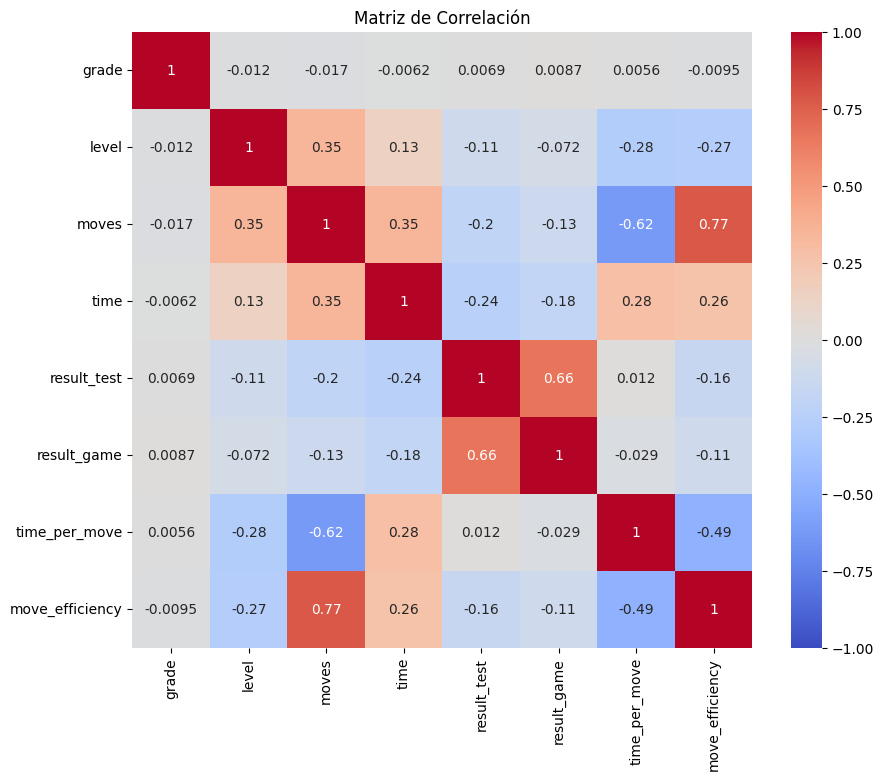

In [ ]:
# Calcula la matriz de correlación
hanoi_df_temp = hanoi_df.copy()
hanoi_df_temp['grade'] = hanoi_df_temp['grade'].astype('category').cat.codes
hanoi_df_temp['game'] = hanoi_df_temp['game'].astype('category').cat.codes
hanoi_df_temp['result_test'] = hanoi_df_temp['result_test'].astype('category').cat.codes
hanoi_df_temp['result_game'] = hanoi_df_temp['result_game'].astype('category').cat.codes
hanoi_df_temp = hanoi_df_temp.drop('game', axis=1)

correlation_matrix = hanoi_df_temp.corr()
print(correlation_matrix)

# Dibuja la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

# Visualizaciones

## Descripción general

### Distribución por grado


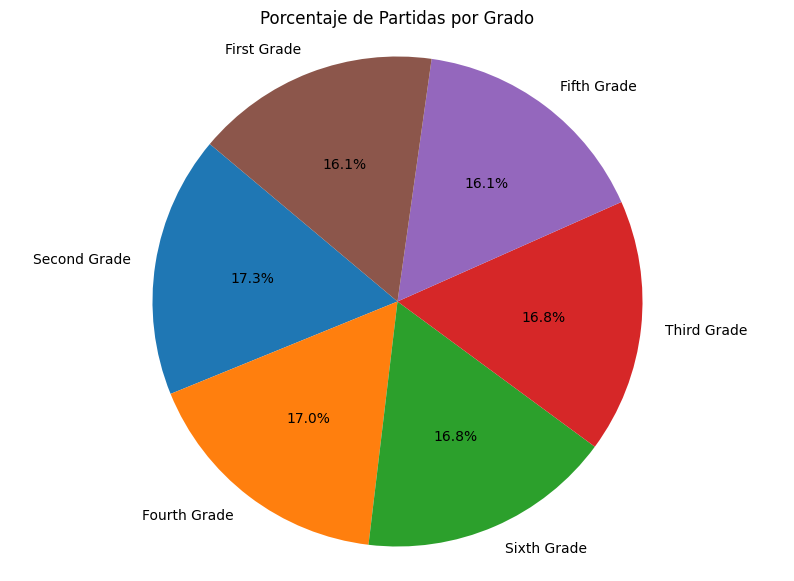

In [ ]:
# Contar el número de partidas por grado
grade_counts = hanoi_df['grade'].value_counts()

# Crear la gráfica de torta
plt.figure(figsize=(10, 7))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Partidas por Grado')
plt.axis('equal')
plt.show()

### Número de partidas por grado y nivel

<ipython-input-30-bacee2c0b57e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = hanoi_df.groupby(['grade', 'level']).size().unstack().fillna(0)


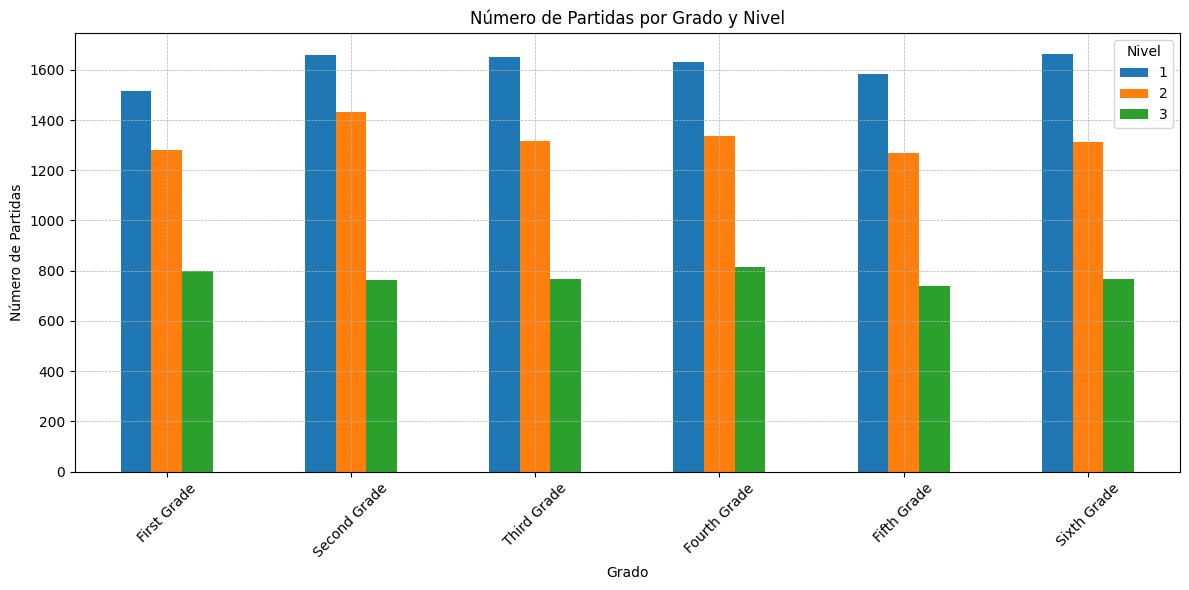

In [ ]:
# Contar el número de partidas por grado y nivel
counts = hanoi_df.groupby(['grade', 'level']).size().unstack().fillna(0)

# Crear la gráfica
counts.plot(kind='bar', stacked=False, figsize=(12, 6))

plt.title('Número de Partidas por Grado y Nivel')
plt.xlabel('Grado')
plt.ylabel('Número de Partidas')
plt.legend(title='Nivel')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# Hipótesis 1: Los jugadores que juegan a niveles más altos (level) tienden a tener mejores eficiencias de movimiento (move_efficiency).

### Distribución de la eficiencia de movimientos por nivel de juego

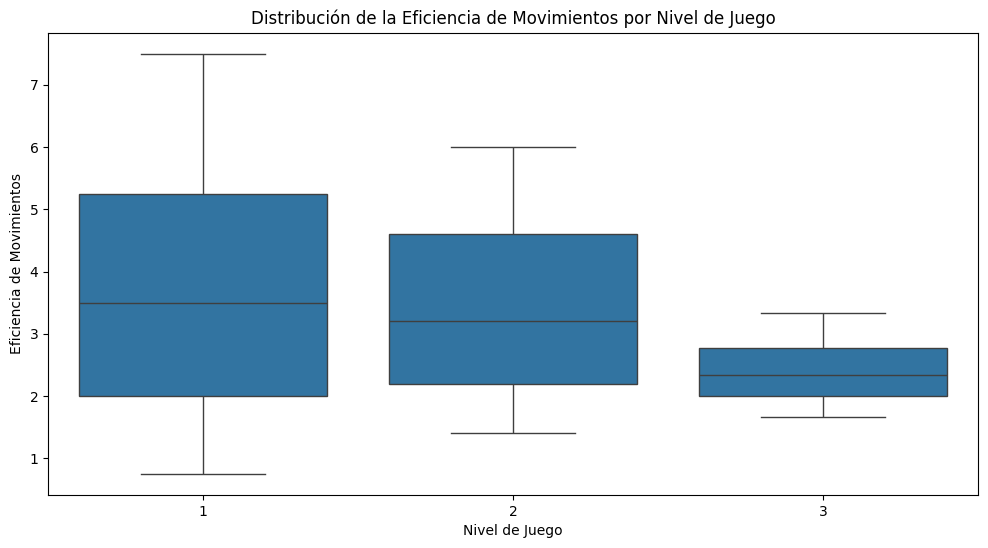

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='level', y='move_efficiency', data=hanoi_df)
plt.title('Distribución de la Eficiencia de Movimientos por Nivel de Juego')
plt.xlabel('Nivel de Juego')
plt.ylabel('Eficiencia de Movimientos')
plt.show()

### Promedio de eficiencia de movimientos por nivel de juego.

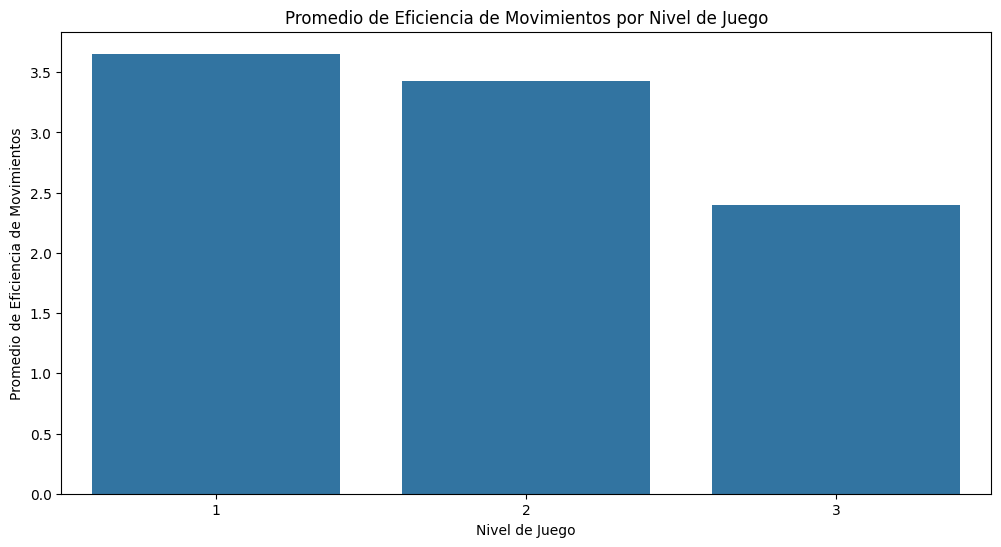

In [ ]:
# Calcular el promedio de eficiencia de movimientos por nivel
avg_efficiency_by_level = hanoi_df.groupby('level')['move_efficiency'].mean().reset_index()

# Crear la visualización
plt.figure(figsize=(12, 6))
sns.barplot(x='level', y='move_efficiency', data=avg_efficiency_by_level)
plt.title('Promedio de Eficiencia de Movimientos por Nivel de Juego')
plt.xlabel('Nivel de Juego')
plt.ylabel('Promedio de Eficiencia de Movimientos')
plt.show()

### Relación entre movimientos y nivel de juego

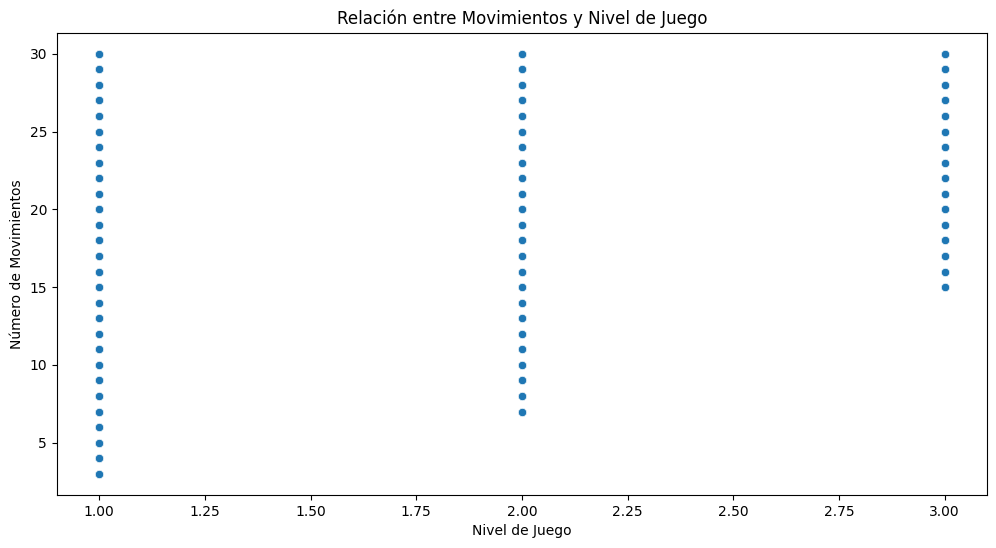

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='level', y='moves', data=hanoi_df)
plt.title('Relación entre Movimientos y Nivel de Juego')
plt.xlabel('Nivel de Juego')
plt.ylabel('Número de Movimientos')
plt.show()

# Hipótesis 2: Los estudiantes que pasan el test escrito también tienen alta eficiencia de movimientos en el juego

### Distribución de la eficiencia de movimientos por resultado del test escrito

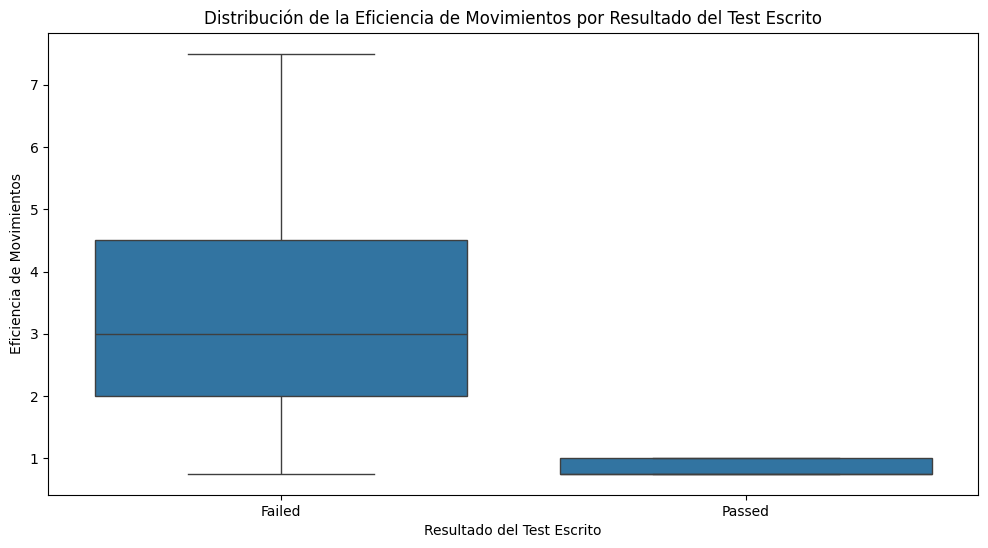

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='result_test', y='move_efficiency', data=hanoi_df)
plt.title('Distribución de la Eficiencia de Movimientos por Resultado del Test Escrito')
plt.xlabel('Resultado del Test Escrito')
plt.ylabel('Eficiencia de Movimientos')
plt.show()


## Promedio de eficiencia de movimientos por resultado del test escrito

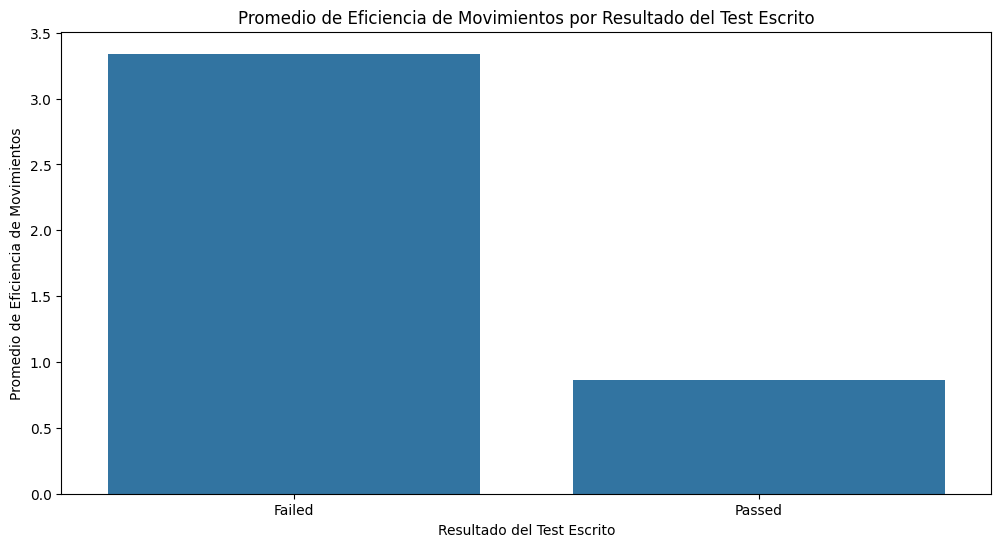

In [ ]:
avg_efficiency_by_result = hanoi_df.groupby('result_test')['move_efficiency'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='result_test', y='move_efficiency', data=avg_efficiency_by_result)
plt.title('Promedio de Eficiencia de Movimientos por Resultado del Test Escrito')
plt.xlabel('Resultado del Test Escrito')
plt.ylabel('Promedio de Eficiencia de Movimientos')
plt.show()

## Relación entre eficiencia de movimientos y resultado del test escrito

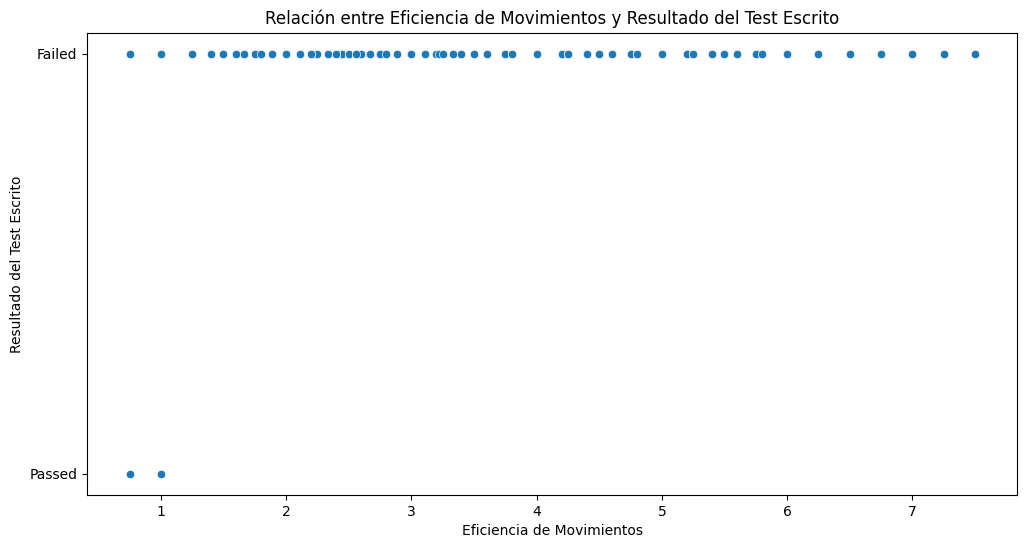

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='move_efficiency', y='result_test', data=hanoi_df)
plt.title('Relación entre Eficiencia de Movimientos y Resultado del Test Escrito')
plt.xlabel('Eficiencia de Movimientos')
plt.ylabel('Resultado del Test Escrito')
plt.show()

# Hipótesis 3: Los estudiantes que pasan el test escrito (result) tienden a tener mejores eficiencias de movimiento (move_efficiency).


## Distribución del tiempo promedio por movimiento por grado escolar


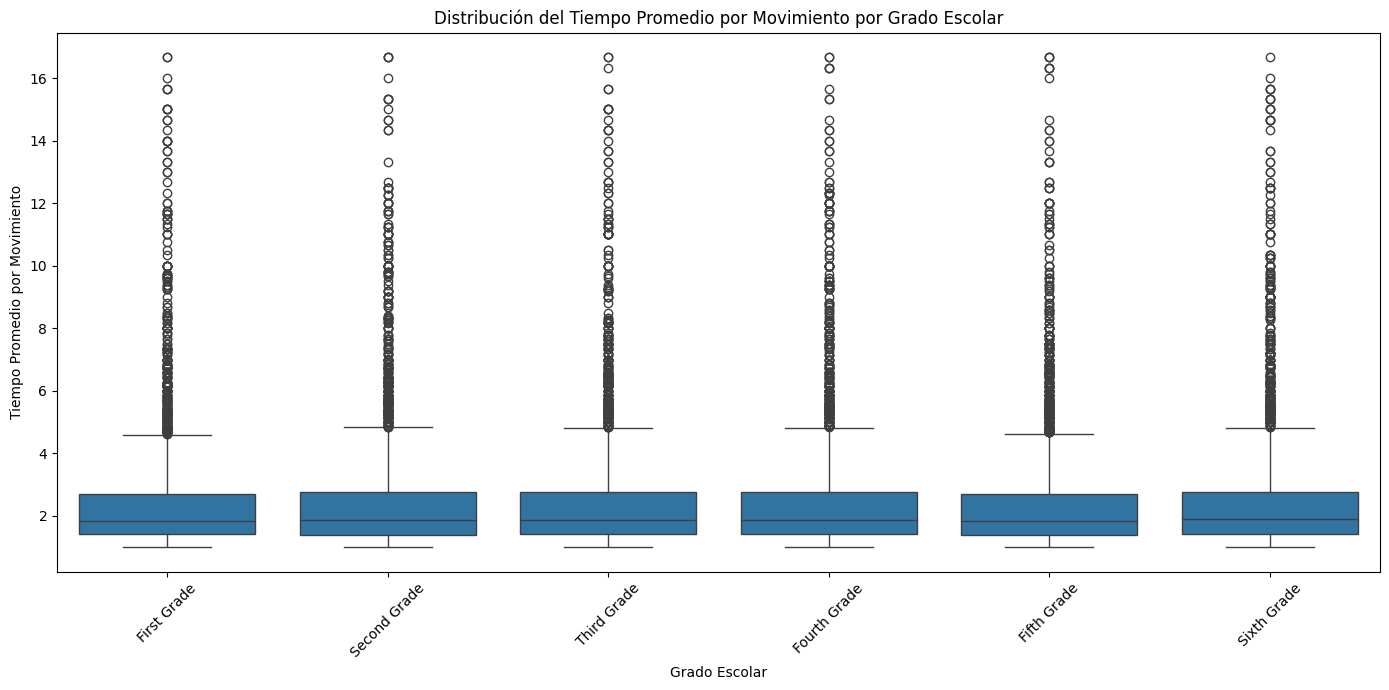

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='grade', y='time_per_move', data=hanoi_df)
plt.title('Distribución del Tiempo Promedio por Movimiento por Grado Escolar')
plt.xlabel('Grado Escolar')
plt.ylabel('Tiempo Promedio por Movimiento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Promedio de tiempo por movimiento por grado escolar

<ipython-input-38-d326ff23bf45>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_per_move_by_grade = hanoi_df.groupby('grade')['time_per_move'].mean().reset_index()


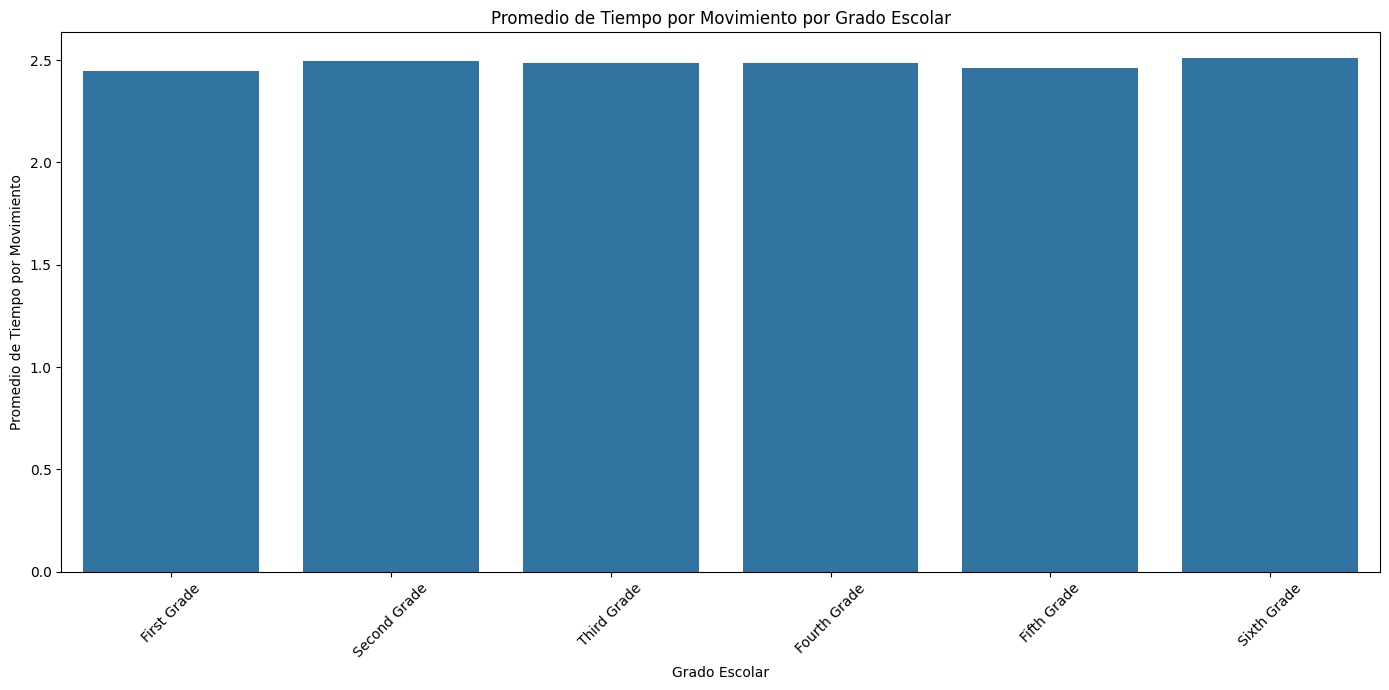

In [ ]:
avg_time_per_move_by_grade = hanoi_df.groupby('grade')['time_per_move'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='grade', y='time_per_move', data=avg_time_per_move_by_grade)
plt.title('Promedio de Tiempo por Movimiento por Grado Escolar')
plt.xlabel('Grado Escolar')
plt.ylabel('Promedio de Tiempo por Movimiento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Relación entre tiempo promedio por movimiento y grado escolar

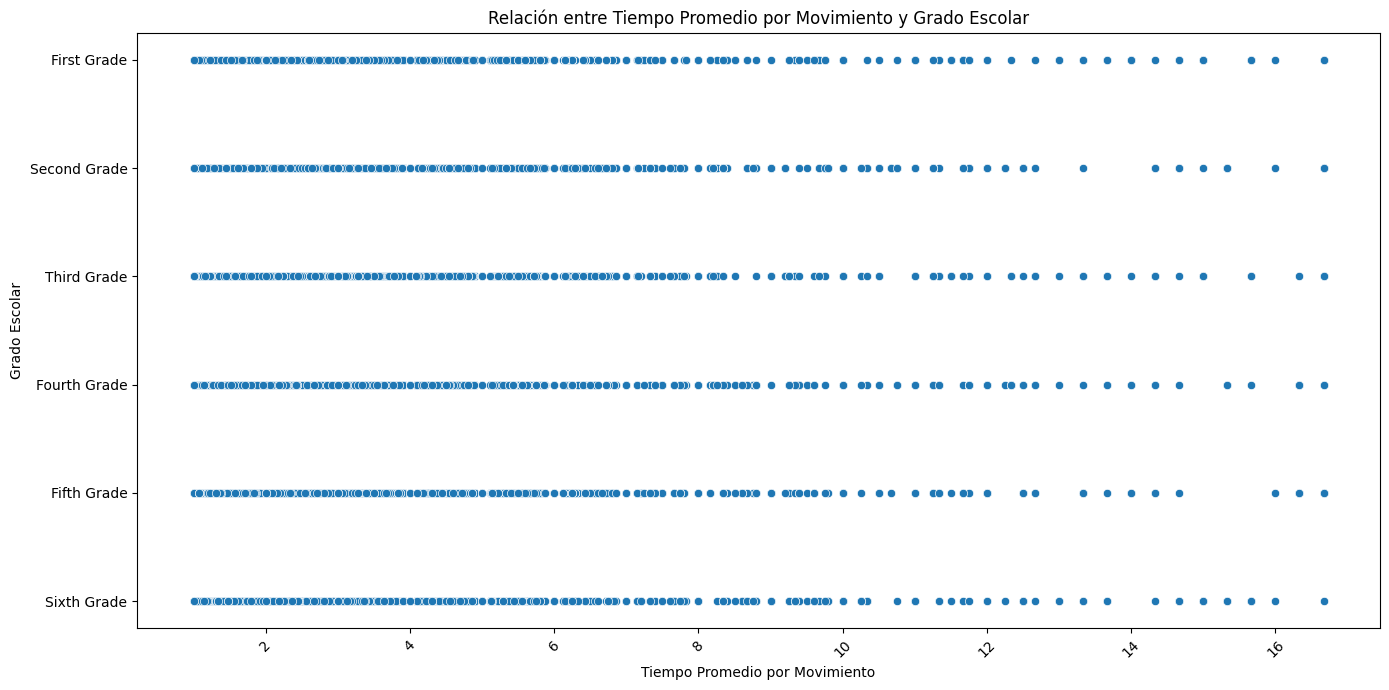

In [ ]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='time_per_move', y='grade', data=hanoi_df)
plt.title('Relación entre Tiempo Promedio por Movimiento y Grado Escolar')
plt.xlabel('Tiempo Promedio por Movimiento')
plt.ylabel('Grado Escolar')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Fuentes

https://core.ac.uk/reader/235050327

Comprender el entorno

Se tiene que comprender que el entorno fue realizado en el colegio Fe y Alegria 45 Paola Frascinetti de arequipa a estudiantes del grado de primaria por lo que se uso de referencia el libro de E-learning and blended para comprender mejor sobre E-learning y ademas sobre filtrado Colaborativo

Basado en Usuarios: Este método recomienda ítems que otros usuarios con gustos similares han disfrutado. Por ejemplo, si a dos usuarios les gustan varias películas en común, lo que uno ha visto y el otro no, puede ser recomendado .
Basado en Ítems: Aquí se recomiendan ítems similares a los que el usuario ya ha calificado positivamente. Si un usuario ha disfrutado de ciertas películas, se le recomendarán otras películas similares basadas en atributos compartidos.
Ref Bibliograficas:

Bobadilla, J., Ortega, F., Hernando, A., & Gutiérrez, A. (2013). Recommender systems survey. Knowledge-based systems, 46, 109-132.
Ricci, F., Rokach, L., & Shapira, B. (2011). Introduction to recommender systems handbook. Springer.